In [163]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from sklearn.svm import SVC

In [165]:
def objective(wb):
    w = wb[:2]
    return 0.5 * np.dot(w, w)

# Define the constraints: y_i (w.x_i + b) >= 1 → 1 - y_i(w.x_i + b) <= 0
def constraint_i(wb, x_i, y_i):
    w = wb[:2]
    b = wb[2]
    return y_i * (np.dot(w, x_i) + b) - 1

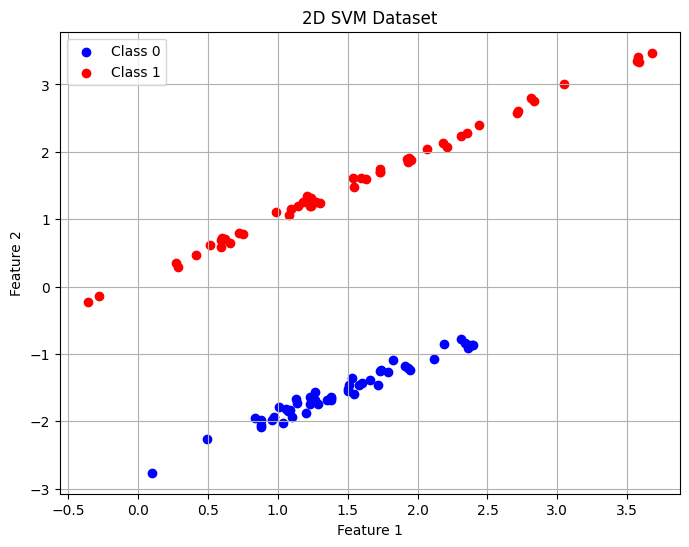

In [167]:
X, y = make_classification(
    n_samples=100,        # Number of points
    n_features=2,         # Two features (2D)
    n_redundant=0,        # No redundant features
    n_clusters_per_class=1,
    class_sep=1.5,        # Separation between classes
    random_state=42
)
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D SVM Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [168]:
y = 2*y - 1 #convert 0s and 1s to -1 and 1s
initial_guess = np.zeros(3)
constraints = [{'type': 'ineq', 'fun': constraint_i, 'args': (X[i], y[i])} for i in range(len(X))]
solution = minimize(objective, initial_guess, constraints=constraints)
w_opt = solution.x[:2]
b_opt = solution.x[2]
print(w_opt, b_opt)

[-0.62810075  0.74710484] 0.9617394532254986


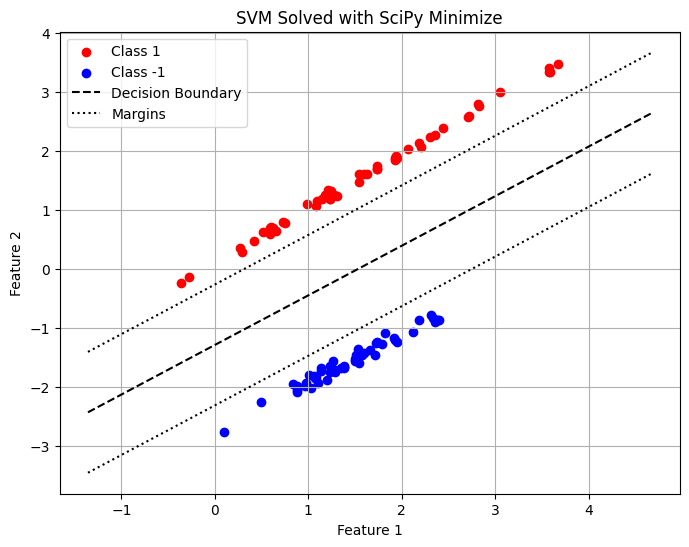

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')

x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
y_vals = -(w_opt[0] * x_vals + b_opt) / w_opt[1] # w1 * x1 + w2 * y2 + b = 0 → x2 = -(w1*x1 + b)/w2
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

margin = 1 / np.linalg.norm(w_opt) # |w.Tx+b|/||w||
y_margin_up = y_vals + margin # upper hyperplane
y_margin_down = y_vals - margin #lower hyperplane
plt.plot(x_vals, y_margin_up, 'k:', label='Margins')
plt.plot(x_vals, y_margin_down, 'k:')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Solved with SciPy Minimize')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
clf = SVC(kernel='linear')
clf.fit(X, y)

# Step 3: Get weights and bias
w = clf.coef_[0]
b = clf.intercept_[0]
print(w, b)

[-0.62743986  0.74783622] 0.961627607352435


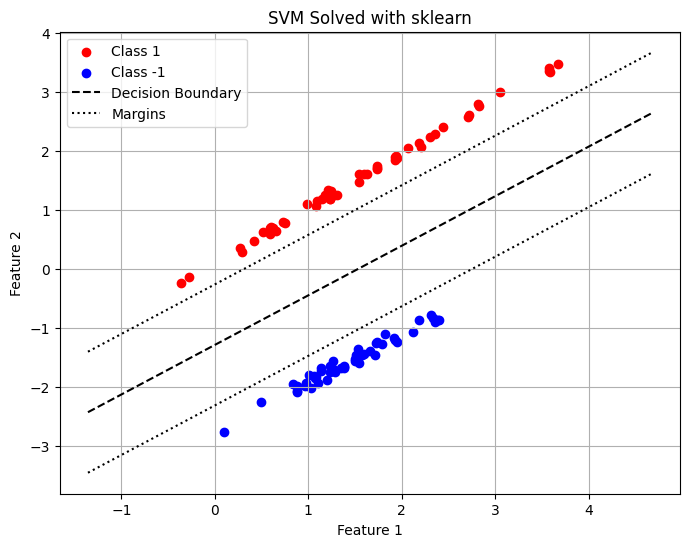

In [175]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')

x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
y_vals = -(w[0] * x_vals + b) / w[1] # w1 * x1 + w2 * y2 + b = 0 → x2 = -(w1*x1 + b)/w2
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

margin = 1 / np.linalg.norm(w_opt)
y_margin_up = y_vals + margin
y_margin_down = y_vals - margin
plt.plot(x_vals, y_margin_up, 'k:', label='Margins')
plt.plot(x_vals, y_margin_down, 'k:')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Solved with sklearn')
plt.legend()
plt.grid(True)
plt.show()